# Definice a importy

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

$$\bra{\Psi}\Omega\ket{\Psi}$$


$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\braket{\Psi}{\Psi}$$


$$\braket{\frac{\Psi}{2}}{\Psi}$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib

In [ ]:
plt.rcParams['text.latex.preamble']=r"\usepackage{mlmodern}"
plt.rcParams["text.usetex"] = True
plt.rcParams["font.size"] = 11
plt.rcParams["font.family"] = 'mlmodern'
#plt.rcParams["mathtext.fontset"] = "cm"

In [19]:
%set_env QXToken=deleteThisAndPasteYourTokenHere

env: QXToken=deleteThisAndPasteYourTokenHere


In [168]:
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime.fake_provider import FakeGeneva, FakeKyoto, FakeBrisbane, FakeOsaka
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService

Usage: qc.draw('mpl', style = my_style)

In [12]:
my_style = {
"backgroundcolor" : "#111111",
"linecolor" : "#FFFFFF",
"textcolor": "#FFFFFF",
"gatetextcolor": "#FFFFFF" }

In [18]:
import qiskit

qiskit.__version__

'1.1.1'

# Qskit test 

## Statevector

In [41]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.z(0)
qc.x(1)

### Don't change any code past this line ###
qc.measure_all()
qc.draw()

┌───┐     ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■──┤ Z ├─░─┤M├───
        └───┘┌─┴─┐├───┤ ░ └╥┘┌─┐
   q_1: ─────┤ X ├┤ X ├─░──╫─┤M├
             └───┘└───┘ ░  ║ └╥┘
meas: 2/═══════════════════╩══╩═
                           0  1

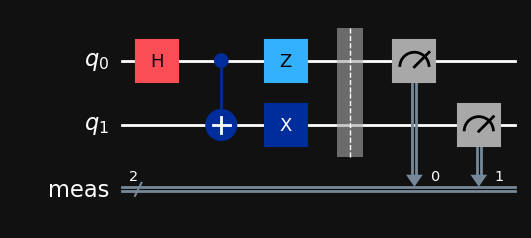

In [42]:
qc.draw('mpl', style = my_style)

In [43]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'01': 5057, '10': 4943}


## Sampler

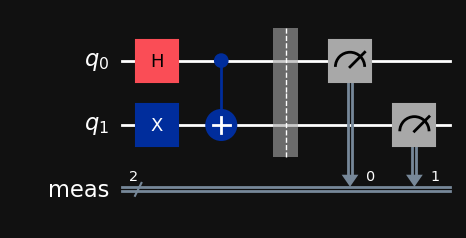

In [156]:
qc2 = QuantumCircuit(2)

qc2.x(1)
qc2.h(0)
qc2.cx(0,1)
qc2.measure_all()

qc2.draw('mpl', style = my_style)

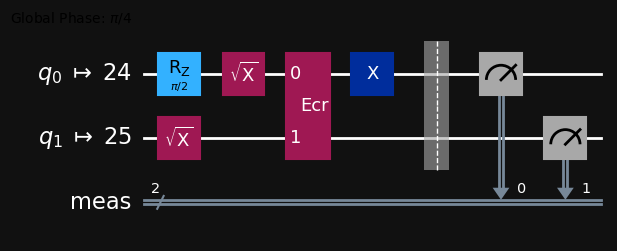

In [173]:
#backend = FakeSherbrooke()
#backend = AerSimulator()
#backend = FakeGeneva()
#backend = FakeKyoto()
#backend = FakeBrisbane()
backend = FakeOsaka()

backend_answer = backend
optimization_level_answer = 2 
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)
isa_circuit = pm.run(qc2) 

pub = (isa_circuit)

isa_circuit.draw('mpl', idle_wires=False, style = my_style)

In [174]:
with Session(backend=backend) as session:
    sampler = Sampler(mode=session)

    result = sampler.run(pubs=[pub], shots=10000).result()
    print(result[0].data.meas.get_counts())

{'10': 4982, '01': 4890, '00': 65, '11': 63}


In [175]:
options = None #options = {"simulator": {"seed_simulator": 42}}
sampler = Sampler(mode=backend, options=options)
 
result = sampler.run(pubs=[pub], shots=10000).result()
print(result[0].data.meas.get_counts())

{'01': 4907, '10': 4973, '00': 73, '11': 47}


In [ ]:
aer = AerSimulator.from_backend(backend)
sampler = Sampler(mode=aer)

result = sampler.run(pubs=[pub], shots=10000).result()
print(result[0].data.meas.get_counts())